# Gradientenverfahren

Eine ungleich effektivere Methode ist die Anwendung des _Gradientenverfahrens_. Eine elegante Methode ist es, zunächst die Annäherung an das Optimum selbst als Kurve darzustellen - was geschieht, wenn wir uns nähern?

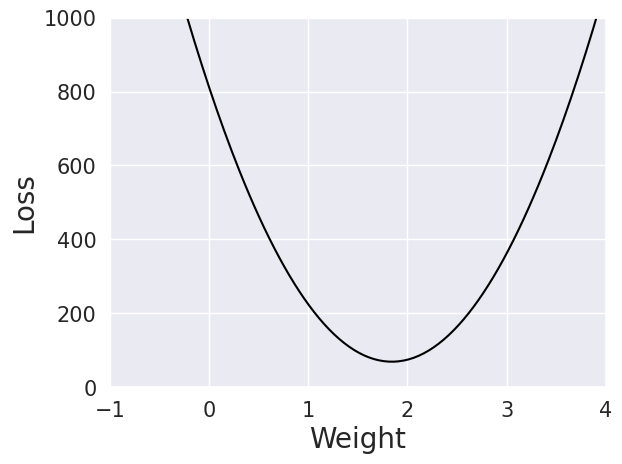

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

sns.set()  # Activate Seaborn

# Compute losses for w ranging from -1 to 4
weights = np.linspace(-1.0, 4.0, 200)
losses = [loss(X, Y, w, 0) for w in weights]

# Plot weights and losses
plt.axis([-1, 4, 0, 1000])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Weight", fontsize=20)
plt.ylabel("Loss", fontsize=20)
plt.plot(weights, losses, color="black")

# Put a green cross on the minimum loss
#min_index = np.argmin(losses)
#plt.plot(weights[min_index], losses[min_index], "gX", markersize=26)

plt.show()


Diese Kurve zeigt die Entwicklung der Verluste im Intervall von $w$ zwischen -1 und 4. Erwartungsgemäß finden wir das Minimum der Kurve bei $w=1.840$ und mit einem Verlust von dann 69.123947. Mit anderen Worten: die "Lösung" unseres Trainings liegt im Minimum der Näherungskurve.

Die Gleichung der Verlustkurve entspricht der mathematischen Darstellung unserer bisherigen Methode `loss`, nämlich

$$ L = {\frac 1 m} \sum_{i=1}^m ((wx_i + b) - y_i)^2 $$

Das ist die mathematische Übersetzung des Rückgabewerts unserer `loss`-Methode:

``` python
np.average((predict(X, w, b) - Y) ** 2)
```
Und von diesem mathematischen Ausdruck können wir leicht die optimale Näherung, also den geringsten Verlust als Minimum der ersten Ableitung der Funktion ausdrücken:

$$ {\frac {\partial L} {\partial w}} = {\frac 2 m} \sum_{i=1}^m x_i ((wx_i + b) - y_i) $$

Das ist die Ableitung der Verluste nach dem Gewicht - wir erhalten eine Gerade, die das Gefälle der Verlustkurve ausdrückt und im Verlustminimum keine Neigung hat (also parallel zur Gewichtsachse läuft). Mit einem Bias von 0 ließe sich der Gradient so ausdrücken in Python:

```python
np.average(X * (predict(X, w, 0) - Y))
```

Damit können wir einen neuen Trainingsalgorithmus entwickeln: den _Gradientenabstieg_. Die Idee ist es, die Ableitungsfunktion dazu zu benutzen, den Wert $w$ in den Trainingsdurchläufen anzupassen. Und zwar so, dass der Wert verringert wird, um die Neigung des Gradienten. D.h. an den Stellen der Verlustkurve, wo wir noch weit vom Minimum weg sind, gehen wir große Schritte, wir verringern das $w$ stärker. Je näher wir dem Optimum kommen, um so kleinere Schritte machen wir - denn die Neigung wird geringer, und damit ändern wir auch das Gewicht $w$ weniger. So nähern wir uns dem Optimum an. Wichtig ist, dass wir $w$ stetig _verringern_, und nicht vergrößern - da wir uns ja entgegen der Steigung zum Minimum bewegen wollen. Deshalb schreiben wir `w -= g * lr`. Der Wert $lr$ beschreibt hier wieder die Schrittgröße, oder Granularität des Abstiegs. Je größer $lr$, umso schneller kommen wir abwärts.

In [8]:
import numpy as np

def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

def gradient(X, Y, w):
    return 2 * np.average(X * (predict(X, w, 0) - Y))

def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        l = loss(X, Y, w, 0)
        g = gradient(X, Y, w)
        print("Iteration %4d => Loss: %.10f Gradient: %.10f" % (i, l, g))
        w -= g * lr
    return w

X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
w = train(X, Y, iterations=1000, lr=0.0001)
print("\nw=%.10f" % w)


Iteration    0 => Loss: 812.8666666667 Gradient: -806.8000000000
Iteration    1 => Loss: 304.3630879787 Gradient: -453.7443200000
Iteration    2 => Loss: 143.5265791020 Gradient: -255.1858055680
Iteration    3 => Loss: 92.6549949641 Gradient: -143.5164970514
Iteration    4 => Loss: 76.5646303400 Gradient: -80.7136779417
Iteration    5 => Loss: 71.4753484132 Gradient: -45.3933724744
Iteration    6 => Loss: 69.8656402969 Gradient: -25.5292326796
Iteration    7 => Loss: 69.3564996643 Gradient: -14.3576404590
Iteration    8 => Loss: 69.1954616593 Gradient: -8.0747369942
Iteration    9 => Loss: 69.1445263431 Gradient: -4.5412320855
Iteration   10 => Loss: 69.1284158205 Gradient: -2.5539889249
Iteration   11 => Loss: 69.1233201627 Gradient: -1.4363633714
Iteration   12 => Loss: 69.1217084379 Gradient: -0.8078107601
Iteration   13 => Loss: 69.1211986595 Gradient: -0.4543127715
Iteration   14 => Loss: 69.1210374197 Gradient: -0.2555055027
Iteration   15 => Loss: 69.1209864206 Gradient: -0.1436